In [1]:
# 3. MNIST Digit Recognition

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True,
                              transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True,
                              transform=transform)


train_size= int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 28.9k/28.9k [00:00<00:00, 458kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.16MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 110] Connection timed out>



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.00MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 7 * 7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = self.pool(torch.relu(self.conv1(x)))
    x = self.pool(torch.relu(self.conv2(x)))
    x = x.view(-1, 64 * 7 * 7)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = CNN()

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    val_loss = 0.0
    correct = 0
    total = 0
    model.eval()

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Train Loss: {running_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}, Val Accuracy: {100 * correct / total}%')


Epoch 1, Train Loss: 0.15931053505217035, Val Loss: 0.06911083306384055, Val Accuracy: 97.88333333333334%
Epoch 2, Train Loss: 0.049021873448276895, Val Loss: 0.04808899720058222, Val Accuracy: 98.48333333333333%
Epoch 3, Train Loss: 0.032459842489954704, Val Loss: 0.06677968875490169, Val Accuracy: 98.025%
Epoch 4, Train Loss: 0.02371004864361991, Val Loss: 0.040601808985694, Val Accuracy: 98.73333333333333%
Epoch 5, Train Loss: 0.01784420493147142, Val Loss: 0.042776909647379416, Val Accuracy: 98.78333333333333%
Epoch 6, Train Loss: 0.014011901395286259, Val Loss: 0.035191511598431466, Val Accuracy: 98.95%
Epoch 7, Train Loss: 0.01198295426984987, Val Loss: 0.04592610584780019, Val Accuracy: 98.70833333333333%
Epoch 8, Train Loss: 0.009434205346390324, Val Loss: 0.05849884211212892, Val Accuracy: 98.68333333333334%
Epoch 9, Train Loss: 0.009884359606227312, Val Loss: 0.04654487346020842, Val Accuracy: 98.91666666666667%
Epoch 10, Train Loss: 0.0060572925301539725, Val Loss: 0.0446639

In [ ]:
test_loss = 0.0
correct = 0
total = 0

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {100 * correct / total}%')

In [11]:
import numpy as  np

def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

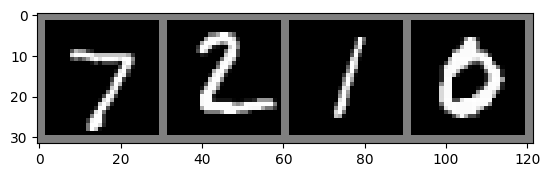

GroundTruth: 7 2 1 0
Predicted: 7 2 1 0


In [15]:
import torchvision

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:4]))
# Print labels
print('GroundTruth:', ' '.join(f'{labels[j].item()}' for j in range(4)))

# Print predictions
outputs = model(images[:4])
_, predicted = torch.max(outputs, 1)
print('Predicted:', ' '.join(f'{predicted[j].item()}' for j in range(4)))

1. **Import Libraries** PyTorch, torchvision for datasets, and others.
2. **Load Data** Download and preprocess the MNIST dataset.
3. **Define CNN Model** Build a simple CNN with convolutional and fully connected layers.
4. **Loss & Optimizer** Use CrossEntropyLoss and Adam Optimizer
5. **Train** Train the model and validate it using a validation set
6. **Evaluate** Test the model on the test set
7. **Visualiza** Display some test images